# Sustainable Fashion Eco-Friendly Trends Analysis

# About this analysis project file:

The dataset file is provided in CSV format for easy analysis 📊. Each record includes the country, brand, type of material used, production method, and consumer engagement level. The columns are carefully designed to help you filter and analyze data with precision, making it perfect for both beginner and advanced data science enthusiasts.

# 🧮 Columns:

Country: Country where the brand is based

Brand: Name of the fashion brand

Sustainable Material (%): Percentage of sustainable materials used by the brand 🌱

Production Process: Method used for producing the clothing (e.g., recycled, organic) 🧵

Consumer Engagement Score: A score (out of 10) reflecting the brand’s impact on sustainable consumer behavior 🛍️

Year: Year the data was collected



In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive\sustainable_fashion_trends_2024.csv")

In [42]:
df

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,BRAND-4996,Brand_4996,Brazil,2010,A,Organic Cotton,Yes,423.73,251736.61,50532.28,No,1,490.95,Stable,NaN
4996,BRAND-4997,Brand_4997,Germany,2012,C,Bamboo Fabric,Yes,68.24,2342347.78,64214.57,Yes,13,53.92,Stable,Fair Trade
4997,BRAND-4998,Brand_4998,Japan,2023,D,Vegan Leather,Yes,321.12,317800.67,81467.21,Yes,12,431.32,Stable,NaN
4998,BRAND-4999,Brand_4999,India,2016,A,Tencel,No,124.83,927539.68,34506.22,Yes,20,322.95,Declining,Fair Trade


In [43]:
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [44]:
df.isnull().sum()

Brand_ID                         0
Brand_Name                       0
Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64

In [45]:
df.head(10)

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade
5,BRAND-0006,Brand_6,Italy,2017,B,Recycled Polyester,No,447.65,2244115.38,69017.63,Yes,10,196.45,Stable,B Corp
6,BRAND-0007,Brand_7,Australia,2015,A,Hemp,Yes,345.64,1020265.49,18373.35,No,17,376.14,Stable,GOTS
7,BRAND-0008,Brand_8,Brazil,2022,C,Tencel,No,336.70,3847649.16,28717.69,No,18,59.34,Declining,OEKO-TEX
8,BRAND-0009,Brand_9,France,2018,D,Recycled Polyester,Yes,386.68,1494891.28,45916.88,Yes,11,91.12,Declining,GOTS
9,BRAND-0010,Brand_10,India,2011,A,Bamboo Fabric,No,250.94,3892548.66,58636.15,No,9,426.55,Stable,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

In [47]:
df['Certifications'] # this column sum missing data

0             GOTS
1             GOTS
2           B Corp
3         OEKO-TEX
4       Fair Trade
           ...    
4995           NaN
4996    Fair Trade
4997           NaN
4998    Fair Trade
4999           NaN
Name: Certifications, Length: 5000, dtype: object

In [48]:
df['Certifications'].fillna('None', inplace = True) 

print(df.isnull().sum())

Brand_ID                      0
Brand_Name                    0
Country                       0
Year                          0
Sustainability_Rating         0
Material_Type                 0
Eco_Friendly_Manufacturing    0
Carbon_Footprint_MT           0
Water_Usage_Liters            0
Waste_Production_KG           0
Recycling_Programs            0
Product_Lines                 0
Average_Price_USD             0
Market_Trend                  0
Certifications                0
dtype: int64


In [49]:
df.describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


In [50]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [51]:
numeric_df

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
0,2018,1.75,4511152.79,97844.11,2,38.33
1,2015,124.39,1951566.31,37267.75,15,250.07
2,2024,336.66,467454.52,38385.92,2,146.16
3,2023,152.04,899576.90,32665.45,13,165.52
4,2016,415.63,1809219.90,37295.47,19,211.63
...,...,...,...,...,...,...
4995,2010,423.73,251736.61,50532.28,1,490.95
4996,2012,68.24,2342347.78,64214.57,13,53.92
4997,2023,321.12,317800.67,81467.21,12,431.32
4998,2016,124.83,927539.68,34506.22,20,322.95


In [52]:
df.columns

Index(['Brand_ID', 'Brand_Name', 'Country', 'Year', 'Sustainability_Rating',
       'Material_Type', 'Eco_Friendly_Manufacturing', 'Carbon_Footprint_MT',
       'Water_Usage_Liters', 'Waste_Production_KG', 'Recycling_Programs',
       'Product_Lines', 'Average_Price_USD', 'Market_Trend', 'Certifications'],
      dtype='object')

In [53]:
numeric_df.columns

Index(['Year', 'Carbon_Footprint_MT', 'Water_Usage_Liters',
       'Waste_Production_KG', 'Product_Lines', 'Average_Price_USD'],
      dtype='object')

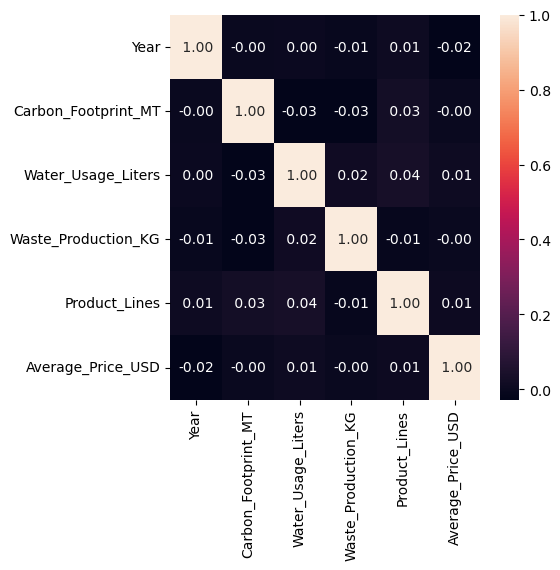

In [54]:
plt.figure(figsize=(5,5))

sns.heatmap(numeric_df.corr(), annot=True, fmt=' .2f')

plt.show()

# Countplot

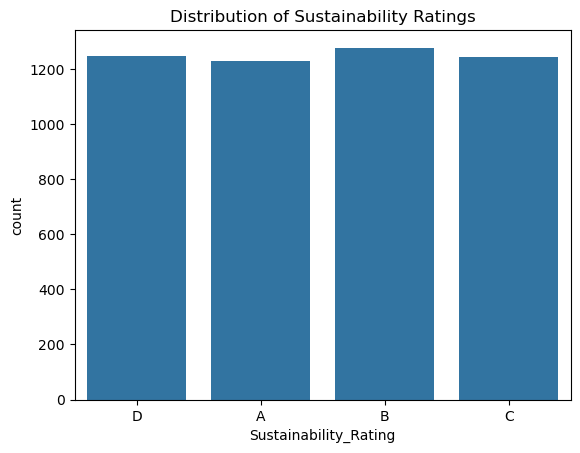

In [74]:
sns.countplot(data=df, x='Sustainability_Rating')

plt.title('Distribution of Sustainability Ratings')

plt.show()

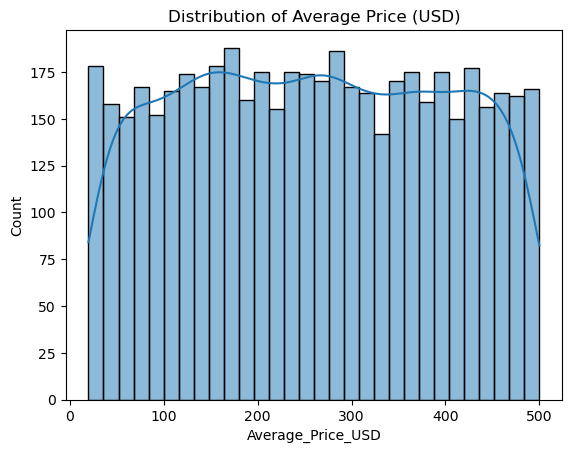

In [56]:
sns.histplot(df['Average_Price_USD'], bins=30, kde=True)
plt.title('Distribution of Average Price (USD)')
plt.show()

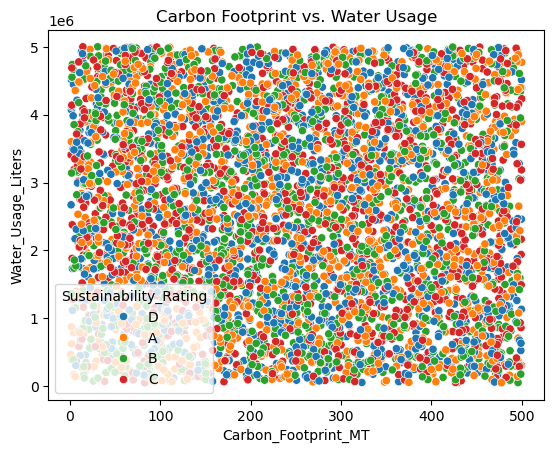

In [57]:
sns.scatterplot(data=df, x='Carbon_Footprint_MT', y='Water_Usage_Liters', hue = 'Sustainability_Rating')

plt.title('Carbon Footprint vs. Water Usage')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

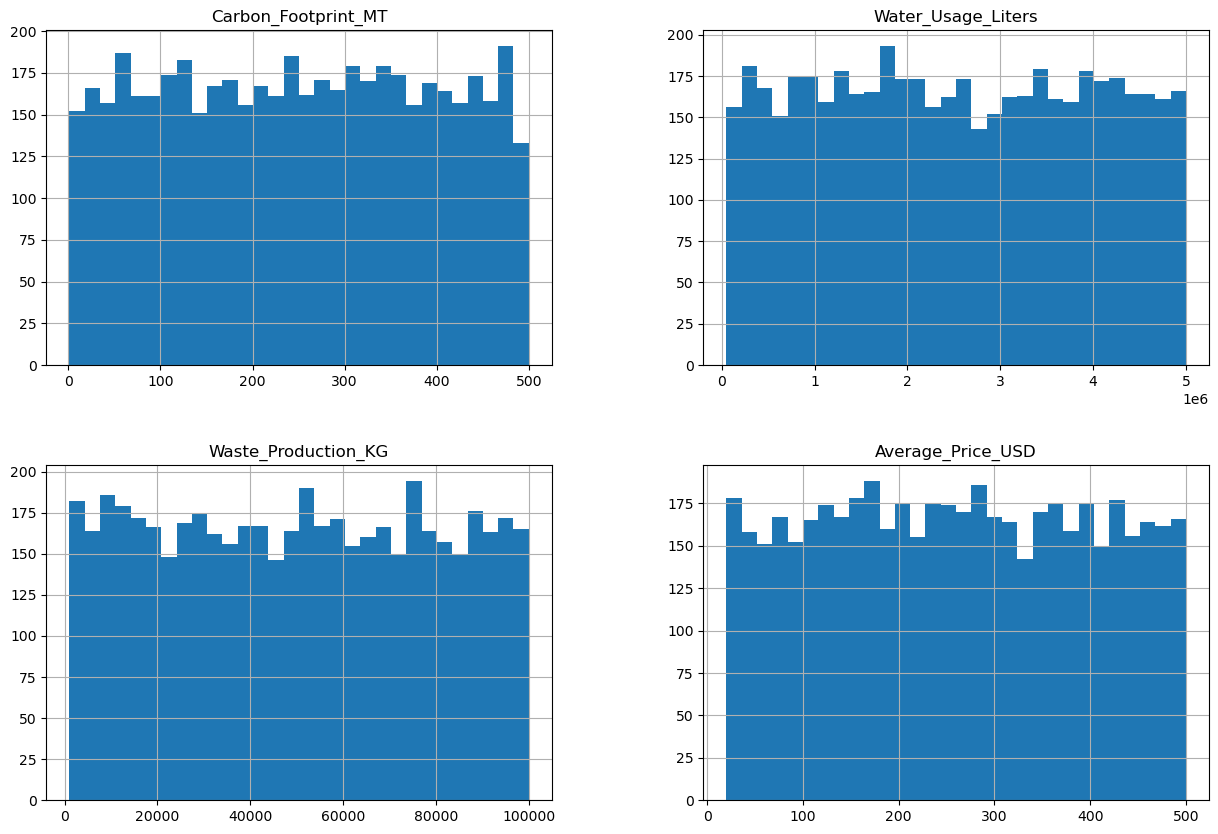

In [58]:
df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 
    'Average_Price_USD']].hist(figsize=(15,10), bins=30)

plt.show

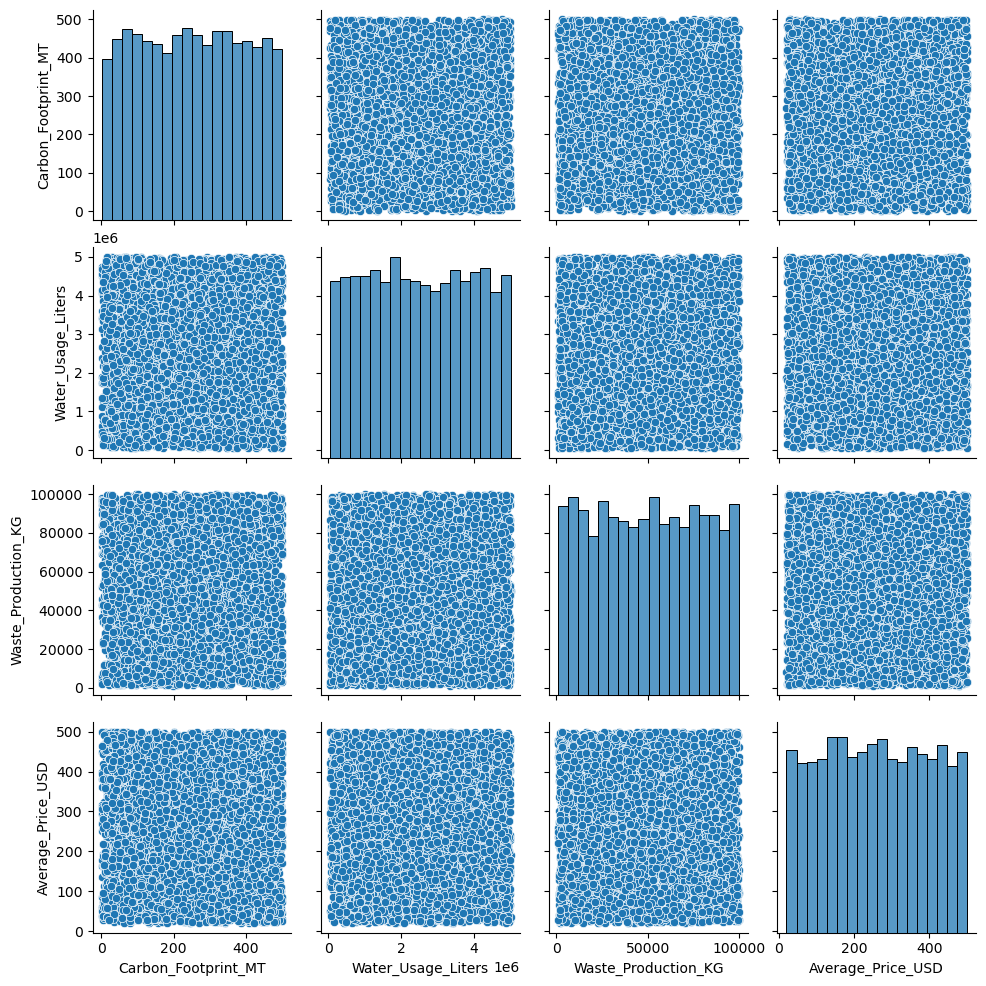

In [59]:
sns.pairplot(df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG',
                 'Average_Price_USD', 'Sustainability_Rating']])

plt.show()

# Categorical Features Analysis

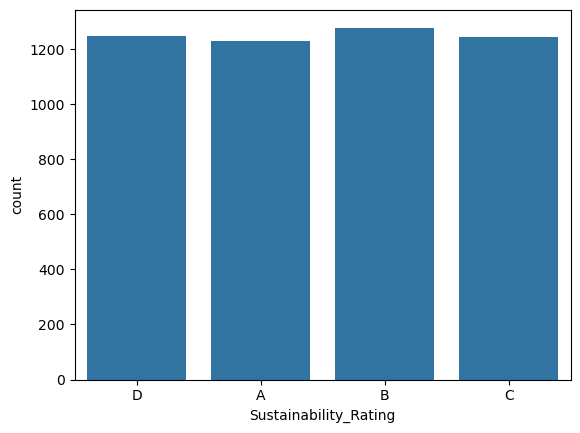

In [64]:
sns.countplot(data=df, x='Sustainability_Rating')

plt.show()

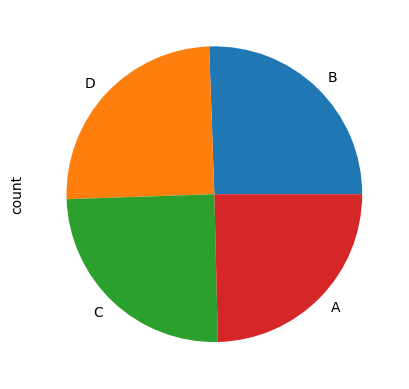

In [70]:
df['Sustainability_Rating'].value_counts().plot.pie()

plt.show()

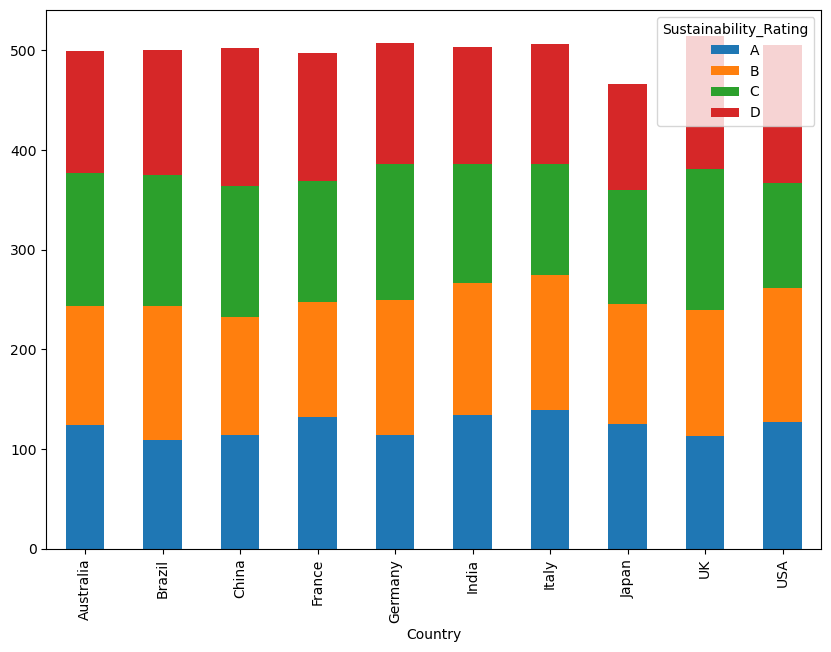

In [71]:
pd.crosstab(df['Country'], df['Sustainability_Rating']).plot.bar(stacked=True, figsize=(10,7))

plt.show()

# Temporal Analysis

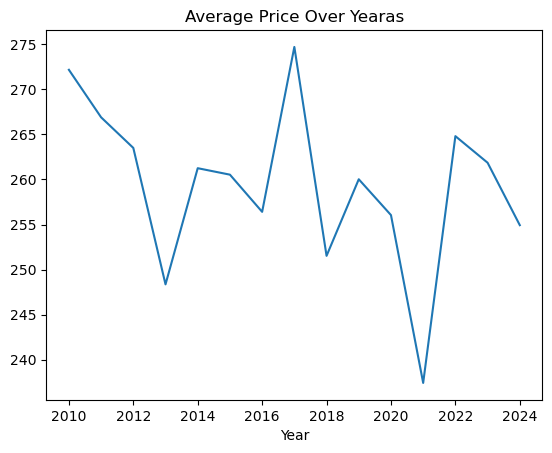

In [75]:
df.groupby('Year')['Average_Price_USD'].mean().plot.line()

plt.title('Average Price Over Yearas')

plt.show()

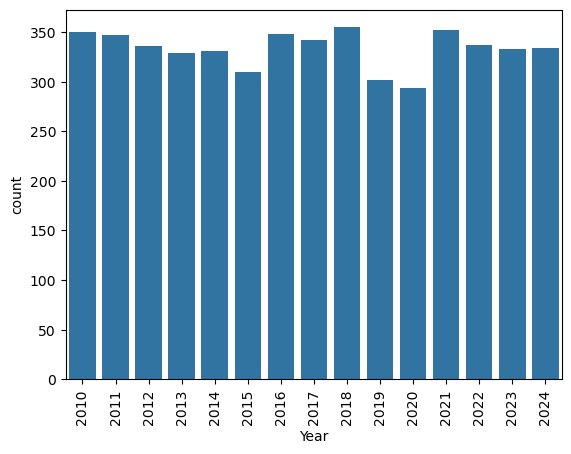

In [79]:
sns.countplot(data=df, x='Year')

plt.xticks(rotation=90)

plt.show()

# Geographical Analysis

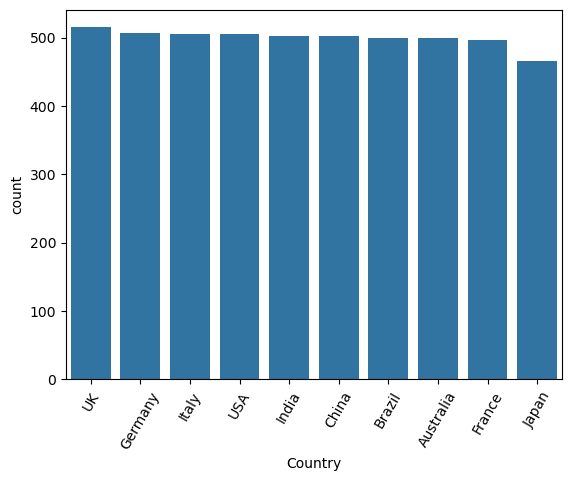

In [82]:
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)

plt.xticks(rotation=60)

plt.show()

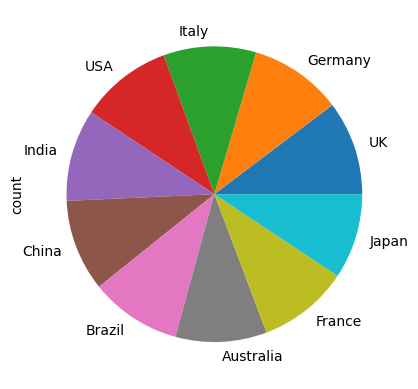

In [90]:
df['Country'].value_counts().plot.pie()

plt.show()

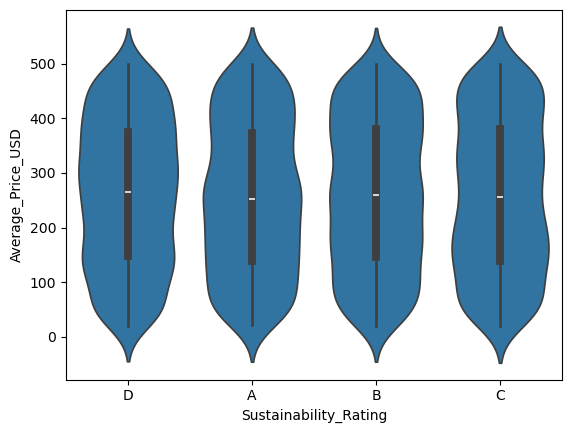

In [91]:
sns.violinplot(data=df, x='Sustainability_Rating', y='Average_Price_USD')

plt.show()

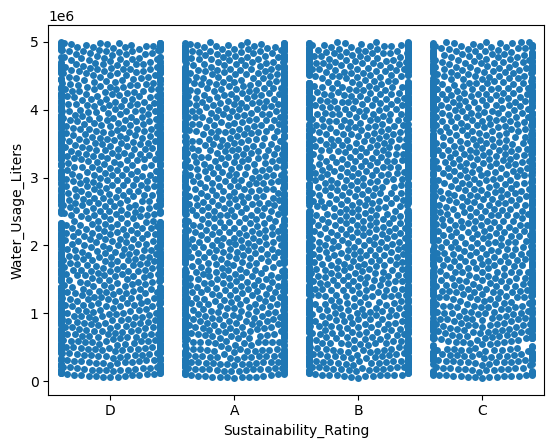

In [93]:
sns.swarmplot(data=df, x='Sustainability_Rating', y='Water_Usage_Liters')

plt.show()

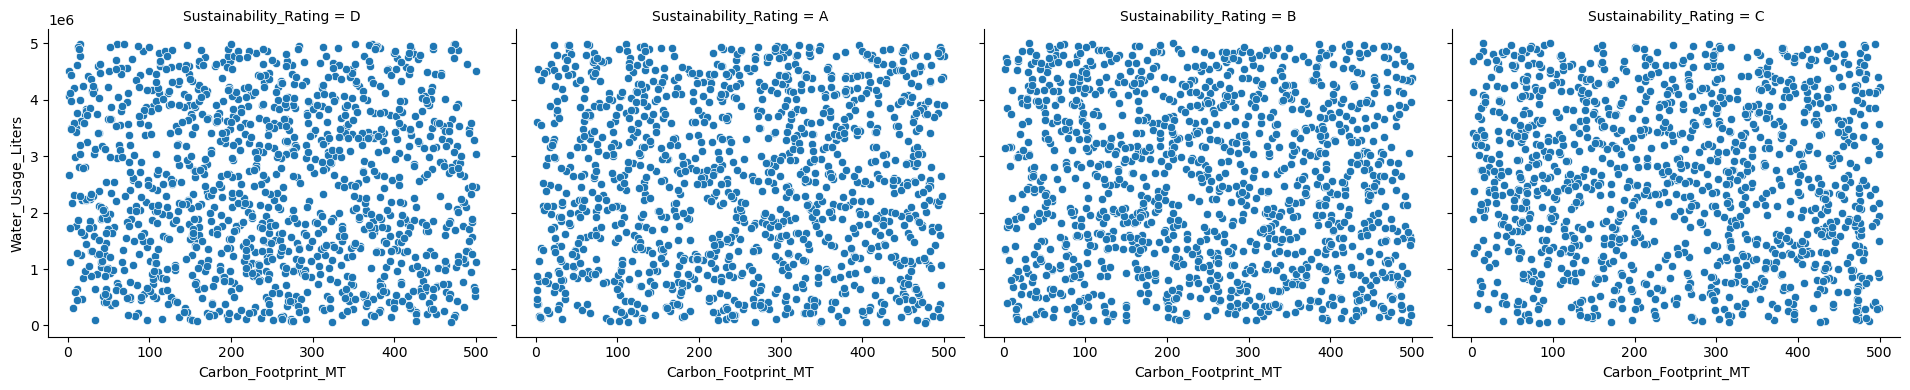

In [94]:
g = sns.FacetGrid(df, col='Sustainability_Rating', height = 4, aspect=1.2)

g.map(sns.scatterplot, 'Carbon_Footprint_MT', 'Water_Usage_Liters')

plt.show()

# Distribution Analysis

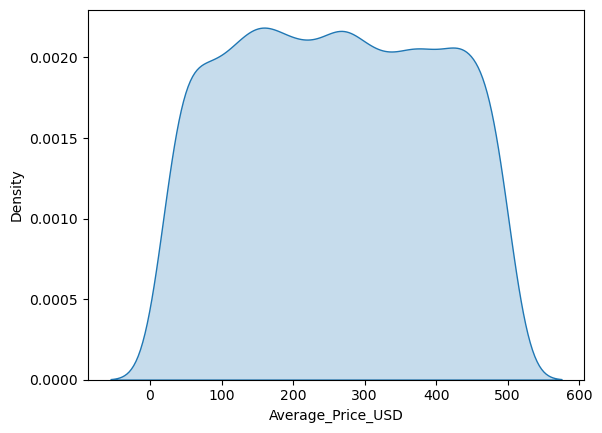

In [95]:
sns.kdeplot(df['Average_Price_USD'], shade=True)

plt.show()

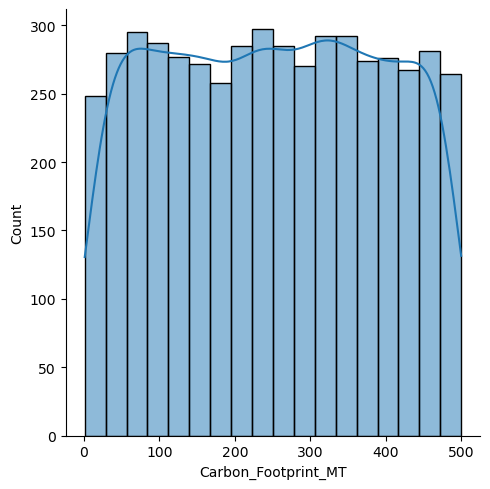

In [108]:
sns.displot(df['Carbon_Footprint_MT'], kde=True)

plt.show()

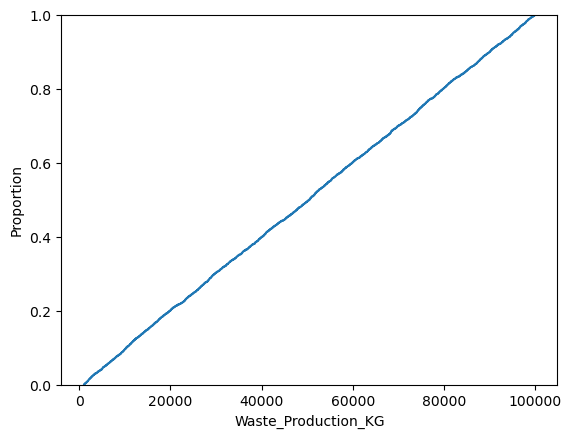

In [109]:
sns.ecdfplot(df['Waste_Production_KG'])

plt.show()

# Comparision Plots

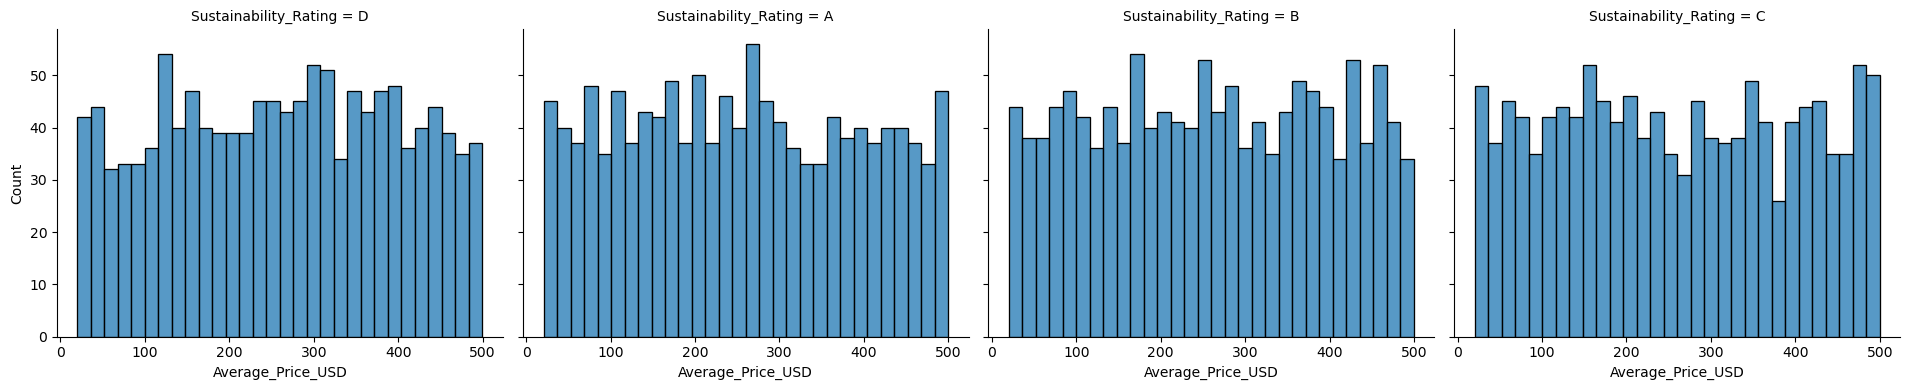

In [111]:
g = sns.FacetGrid(df, col='Sustainability_Rating', height=4, aspect=1.2)

g.map(sns.histplot, 'Average_Price_USD', bins=30)

plt.show()

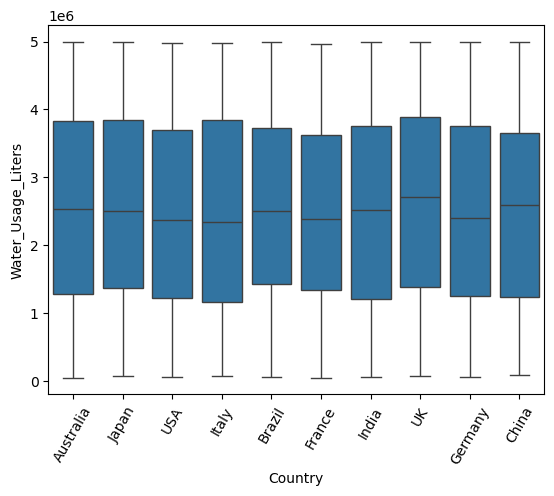

In [113]:
sns.boxplot(data=df, x='Country', y='Water_Usage_Liters')

plt.xticks(rotation=60)

plt.show()

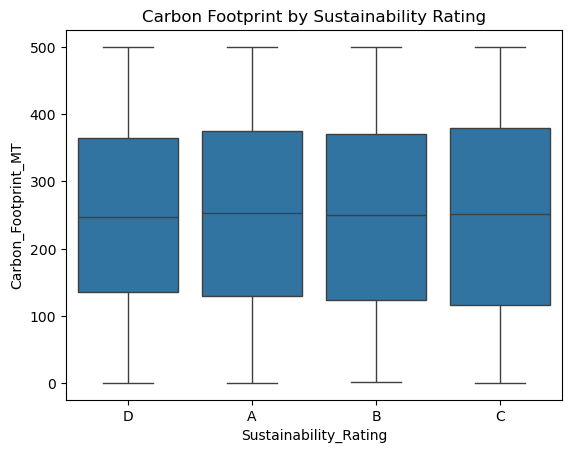

In [114]:
sns.boxplot(data=df, x='Sustainability_Rating', y='Carbon_Footprint_MT')

plt.title('Carbon Footprint by Sustainability Rating')

plt.show()

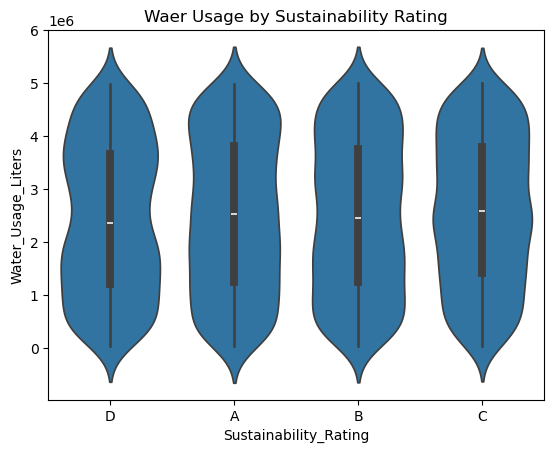

In [115]:
sns.violinplot(data=df, x='Sustainability_Rating', y='Water_Usage_Liters')

plt.title('Waer Usage by Sustainability Rating')

plt.show()

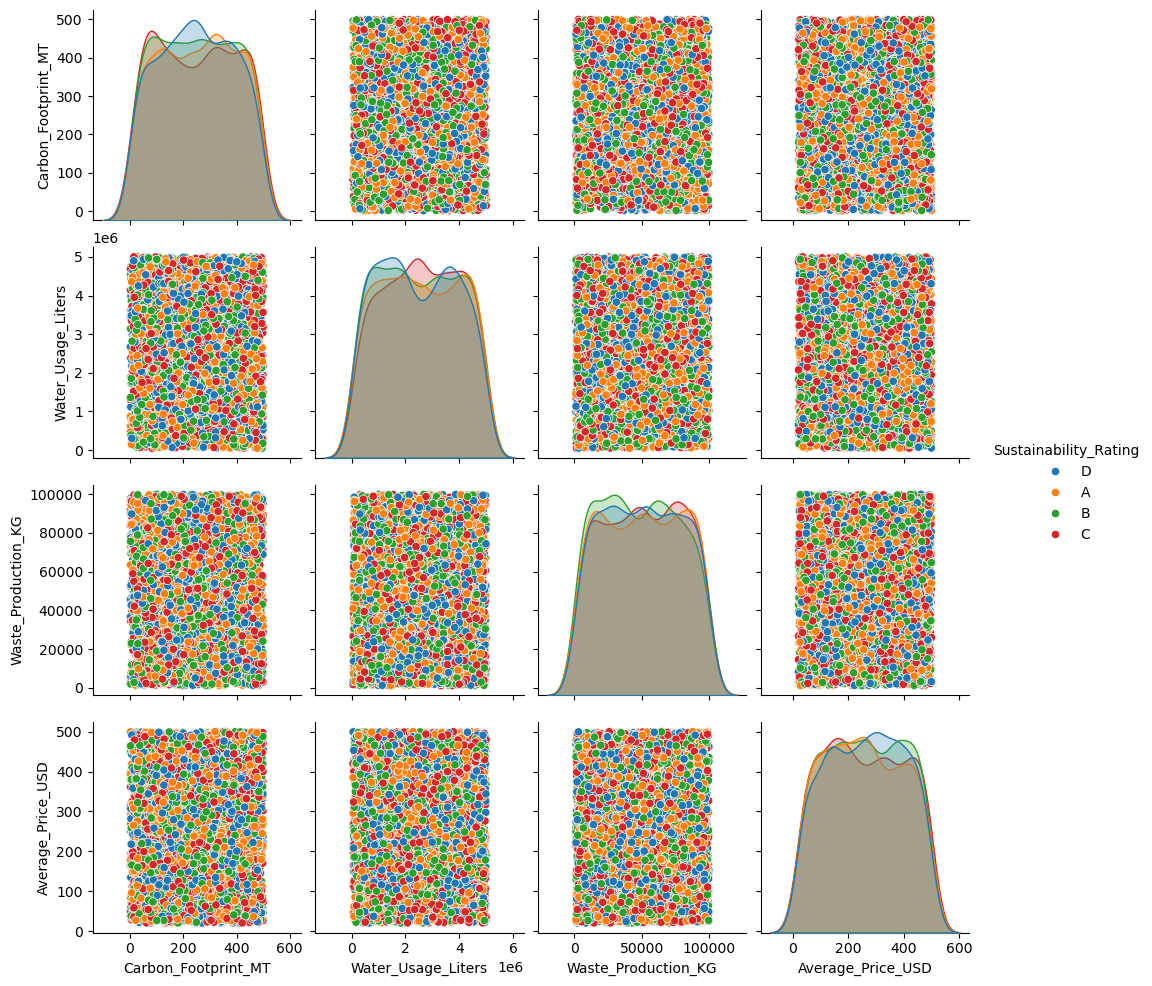

In [118]:
sns.pairplot(df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 
                 'Average_Price_USD','Sustainability_Rating']],
             hue='Sustainability_Rating')

plt.show()

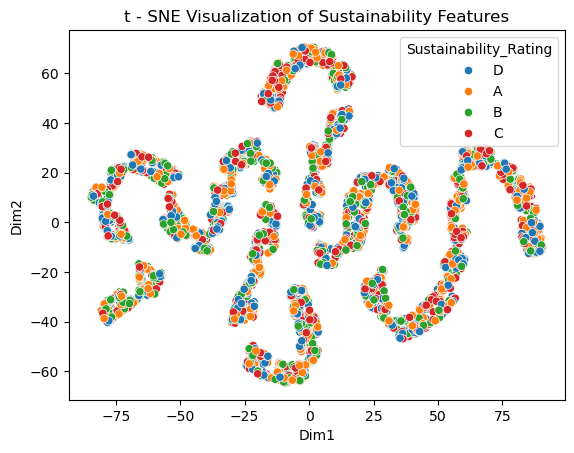

In [122]:
tsne = TSNE(n_components=2, random_state=0)

tnse_results = tsne.fit_transform(df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 
                                      'Waste_Production_KG', 'Average_Price_USD']])

df_tsne = pd.DataFrame(tnse_results, columns=['Dim1', 'Dim2'])

df_tsne['Sustainability_Rating'] = df['Sustainability_Rating']

sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Sustainability_Rating')

plt.title('t - SNE Visualization of Sustainability Features')

plt.show()

                    